In [1]:
from pathlib import Path

import numpy as np

from astropy import units as u
from astropy import table
from astropy.coordinates import SkyCoord

from jwst import datamodels

import requests

In [2]:
%matplotlib inline

from matplotlib import pyplot as plt

from astropy import visualization
visualization.quantity_support()

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x7fb7240b0f90>

Prototype:

to: https://skyserver.sdss.org/dr18/SearchTools/IRQS

searchtool=IRSpectra&TaskName=Skyserver.Search.IRQS&ReturnHtml=true&format=HTML&TableName=&limit=50&irspecparams=typical&positionType=cone&ra=197.61445&dec=18.43816&Lcenter=330.6607&Bcenter=80.2696&radius=5.0&lbRadius=5.0&jMin=&jMax=&hMin=&hMax=&kMin=&kMax=&jhMin=&jhMax=&hkMin=&hkMax=&snrMin=&snrMax=&vhelioMin=&vhelioMax=&scatterMin=&scatterMax=&tempMin=&tempMax=&loggMin=&loggMax=&fehMin=&fehMax=&afeMin=&afeMax=&irTargetFlagsOnList=ignore&irTargetFlagsOffList=ignore&irTargetFlags2OnList=ignore&irTargetFlags2OffList=ignore&__RequestVerificationToken=CfDJ8CadkfLtu8FBoKA4l_mi2JF3dB8_9NlwJClAnqp2st7MjgdZ4dq_KF3Wm_6Lf56XNJk0R7oNkfFa5qmRzrB1H7Jq70Xa7wXhcbO_bfyRAFHbrjQjGS-Q8Ea6WrVcKrsI0ePvQ-F8vHhaSwrTOzDAQP4

Key header:

Content-Type: application/x-www-form-urlencoded

In [3]:
datastr='searchtool=IRSpectra&TaskName=Skyserver.Search.IRQS&ReturnHtml=true&format=HTML&TableName=&limit=50&irspecparams=typical&positionType=cone&ra=197.61445&dec=18.43816&Lcenter=330.6607&Bcenter=80.2696&radius=5.0&lbRadius=5.0&jMin=&jMax=&hMin=&hMax=&kMin=&kMax=&jhMin=&jhMax=&hkMin=&hkMax=&snrMin=&snrMax=&vhelioMin=&vhelioMax=&scatterMin=&scatterMax=&tempMin=&tempMax=&loggMin=&loggMax=&fehMin=&fehMax=&afeMin=&afeMax=&irTargetFlagsOnList=ignore&irTargetFlagsOffList=ignore&irTargetFlags2OnList=ignore&irTargetFlags2OffList=ignore'

res = requests.post('https://skyserver.sdss.org/dr18/SearchTools/IRQS', headers={'Content-Type':'application/x-www-form-urlencoded'}, data=datastr)
res

<Response [200]>

In [4]:
res.text

"<html><head>\n<title>SDSS Query Results</title>\n</head><body bgcolor=white>\n<h1></h1><h3>Your SQL command was: <br><pre>\nSELECT TOP 50 \na.apogee_id,cast(str(a.glon,9,5) as float) glon,cast(str(a.glat,9,5) as float) glat,a.snr,a.vhelio_avg,a.vscatter,q.teff,q.logg,q.m_h,q.alpha_m \nFROM apogeeStar as a \nJOIN dbo.fGetNearbyApogeeStarEq(197.61445,18.43816,5.0) AS b ON  b.apstar_id = a.apstar_id \nJOIN apogeeObject as o ON a.apogee_id=o.apogee_id \nJOIN aspcapStar as q ON a.apstar_id=q.apstar_id  </pre></h3><h3>Your query output (max 500,000 rows): <br></h3><table border='1' BGCOLOR=cornsilk>\n<tr align=center><td><font size=-1>apogee_id</font></td><td><font size=-1>glon</font></td><td><font size=-1>glat</font></td><td><font size=-1>snr</font></td><td><font size=-1>vhelio_avg</font></td><td><font size=-1>vscatter</font></td><td><font size=-1>teff</font></td><td><font size=-1>logg</font></td><td><font size=-1>m_h</font></td><td><font size=-1>alpha_m</font></td></tr><tr align=center BG

In [5]:
datastr='searchtool=IRSpectra&TaskName=Skyserver.Search.IRQS&ReturnHtml=false&format=JSON&TableName=&limit=50&irspecparams=typical&positionType=cone&ra=197.61445&dec=18.43816&Lcenter=330.6607&Bcenter=80.2696&radius=5.0&lbRadius=5.0&jMin=&jMax=&hMin=&hMax=&kMin=&kMax=&jhMin=&jhMax=&hkMin=&hkMax=&snrMin=&snrMax=&vhelioMin=&vhelioMax=&scatterMin=&scatterMax=&tempMin=&tempMax=&loggMin=&loggMax=&fehMin=&fehMax=&afeMin=&afeMax=&irTargetFlagsOnList=ignore&irTargetFlagsOffList=ignore&irTargetFlags2OnList=ignore&irTargetFlags2OffList=ignore'

res = requests.post('https://skyserver.sdss.org/dr18/SearchTools/IRQS', headers={'Content-Type':'application/x-www-form-urlencoded'}, data=datastr)
res.json()

[{'TableName': 'Table1',
  'Rows': [{'apogee_id': '2M13103660+1829505',
    'glon': 331.00701,
    'glat': 80.30698,
    'snr': 82.72615,
    'vhelio_avg': -17.76918,
    'vscatter': 0.248996,
    'teff': 5234.38,
    'logg': 4.530723,
    'm_h': -0.091545,
    'alpha_m': 0.0430513},
   {'apogee_id': '2M13102744+1826172',
    'glon': 330.65989,
    'glat': 80.26965,
    'snr': 8.640174,
    'vhelio_avg': 398.6765,
    'vscatter': 21.82061,
    'teff': -9999,
    'logg': -9999,
    'm_h': -9999,
    'alpha_m': -9999}]},
 {'TableName': 'SqlQuery',
  'Rows': [{'query': '\nSELECT TOP 50 \na.apogee_id,cast(str(a.glon,9,5) as float) glon,cast(str(a.glat,9,5) as float) glat,a.snr,a.vhelio_avg,a.vscatter,q.teff,q.logg,q.m_h,q.alpha_m \nFROM apogeeStar as a \nJOIN dbo.fGetNearbyApogeeStarEq(197.61445,18.43816,5.0) AS b ON b.apstar_id = a.apstar_id \nJOIN apogeeObject as o ON a.apogee_id=o.apogee_id \nJOIN aspcapStar as q ON a.apstar_id=q.apstar_id '}]}]

In [6]:
from astroquery.sdss import SDSS

In [7]:
sres = SDSS.query_sql("""SELECT
a.apogee_id,a.ra,a.dec,cast(str(a.glon,9,5) as float) glon,cast(str(a.glat,9,5) as float) glat,a.snr,a.vhelio_avg,a.vscatter,q.teff,q.logg,q.m_h,q.alpha_m 
FROM apogeeStar as a 
JOIN dbo.fGetNearbyApogeeStarEq(197.61445,18.43816,5.0) AS b ON  b.apstar_id = a.apstar_id 
JOIN apogeeObject as o ON a.apogee_id=o.apogee_id 
JOIN aspcapStar as q ON a.apstar_id=q.apstar_id""")

/usr/local/lib/python3.11/site-packages/astroquery/sdss/core.py:874: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  arr = np.atleast_1d(np.genfromtxt(io.BytesIO(response.content),


In [8]:
sres

apogee_id,ra,dec,glon,glat,snr,vhelio_avg,vscatter,teff,logg,m_h,alpha_m
bytes18,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64
2M13102744+1826172,197.614337,18.438133,330.65989,80.26965,11.6724,-601.24,11.4089,-9999.0,-9999,-9999.0,-9999.0
2M13103660+1829505,197.652525,18.497379,331.00701,80.30698,78.1663,-17.7924,0.179018,5266.644,-9999,0.01806629,0.01521852
2M13103660+1829505,197.652525,18.497379,331.00701,80.30698,75.7516,-17.3073,0.157989,-9999.0,-9999,-9999.0,-9999.0


Ok well, I guess we just use aq then

In [9]:
def make_query(coo, rad, additional_fields=None):
    icoo = coo.transform_to('icrs')
    radeg = icoo.ra.deg
    decdeg = icoo.dec.deg
    radamin = rad.to(u.arcmin).value
    if additional_fields is None:
        additional_fields = ''
    else:
        if isinstance(additional_fields, str):
            if not additional_fields.startswith(','):
                additional_fields = ',' + additional_fields
        else:
            additional_fields = ',' + ','.join(["a." + f for f in fields])
    return f"""SELECT star.apstar_id,
star.apogee_id, star.ra, star.dec, star.glon, star.glat,
star.apogee_target1, star.apogee_target2,
star.snr,star.vhelio_avg,star.vscatter,star.nvisits,
star.gaiaedr3_phot_g_mean_mag,
obj.j, obj.h, obj.k,
aspcap.teff,aspcap.logg,aspcap.m_h,aspcap.alpha_m{additional_fields}
FROM apogeeStar star
JOIN dbo.fGetNearbyApogeeStarEq({radeg},{decdeg},{radamin}) near on star.apstar_id=near.apstar_id
JOIN aspcapStar aspcap on aspcap.apstar_id = star.apstar_id
JOIN apogeeObject obj on near.apogee_id = obj.apogee_id
"""
#     return f"""SELECT 
# a.apogee_id,a.ra,a.dec,cast(str(a.glon,9,5) as float) glon,cast(str(a.glat,9,5) as float) glat,a.snr,a.vhelio_avg,a.vscatter,q.teff,q.logg,q.m_h,q.alpha_m{additional_fields}
# FROM apogeeStar as a 
# JOIN dbo.fGetNearbyApogeeStarEq({radeg},{decdeg},{radamin}) AS b ON  b.apstar_id = a.apstar_id 
# JOIN apogeeObject as o ON a.apogee_id=o.apogee_id 
# JOIN aspcapStar as q ON a.apstar_id=q.apstar_id"""

In [10]:
n6791 = SkyCoord.from_name('NGC6791')
n6791

<SkyCoord (ICRS): (ra, dec) in deg
    (290.221, 37.778)>

In [11]:
res = SDSS.query_sql(make_query(n6791, 20*u.arcmin), data_release=18)
res = table.unique(res)
res

apstar_id,apogee_id,ra,dec,glon,glat,apogee_target1,apogee_target2,snr,vhelio_avg,vscatter,nvisits,gaiaedr3_phot_g_mean_mag,j,h,k,teff,logg,m_h,alpha_m
bytes50,bytes18,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64
apogee.apo25m.stars.K21_071+10.2M19191424+3748528,2M19191424+3748528,289.80936,37.814686,69.8533097752556,11.215289661377,0,0,130.3248,-49.6275,0.0,1,13.407,11.292,10.58,10.403,4179.243,1.795571,0.10801,0.0355994
apogee.apo25m.stars.K21_071+10.2M19192156+3740550,2M19192156+3740550,289.839862,37.681965,69.7421760186398,11.1358554144784,0,0,113.837,-49.37098,0.1200653,7,13.8745,12.069,11.438,11.319,4549.016,2.3675,-0.086825,0.127325
apogee.apo25m.stars.K21_071+10.2M19192471+3752376,2M19192471+3752376,289.852998,37.877132,69.9259123699547,11.2113977404357,0,0,132.8535,-4.401792,0.1386438,7,14.114,12.17,11.519,11.365,4411.766,2.168508,0.028775,0.040041
apogee.apo25m.stars.K21_071+10.2M19194463+3752322,2M19194463+3752322,289.935995,37.875622,69.9535831070382,11.1517545558371,0,0,134.7657,-76.88979,0.04858116,5,13.2242,11.057,10.297,10.102,4097.327,1.116294,-0.50371,0.09681
apogee.apo25m.stars.K21_071+10.2M19194601+3756520,2M19194601+3756520,289.941729,37.9478,70.0218220678194,11.1791075300445,0,0,145.6602,-30.75311,0.0001320102,2,12.1989,10.402,9.827,9.711,4652.394,2.391464,-0.09212,0.129875
apogee.apo25m.stars.K21_071+10.2M19194664+3801059,2M19194664+3801059,289.94436,38.018318,70.0874621387484,11.2079317935333,0,0,166.8243,-4.251705,1.853883,7,14.2227,12.242,11.613,11.456,4654.666,2.759918,0.11044,0.0001950003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
apogee.apo25m.stars.NGC6791_btx.2M19214527+3755090,2M19214527+3755090,290.43864,37.919189,70.1702838006649,10.8141616325374,0,0,101.9471,-40.75279,0.101193,3,14.7265,12.878,12.258,12.129,4645.778,2.660791,0.046519,0.0331353
apogee.apo25m.stars.NGC6791_btx.2M19214774+3759193,2M19214774+3759193,290.44895,37.988712,70.2374985286409,10.8374231337334,0,0,83.79878,6.884727,0.09070409,3,15.0424,13.12,12.483,12.363,4270.638,4.590504,-0.0026739,-0.0644007


In [12]:
res['coo'] = SkyCoord.guess_from_table(res, unit=(u.deg, u.deg))

In [13]:
vvalid = res['vhelio_avg']>-9999
res = res[vvalid]

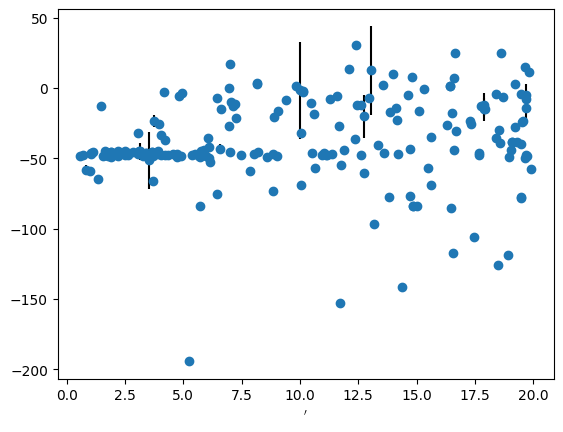

In [14]:
r = res['coo'].separation(n6791).to(u.arcmin)

plt.errorbar(r, res['vhelio_avg'], res['vscatter'], fmt='o', ecolor='k')

fig = plt.gcf()
ax = plt.gca()

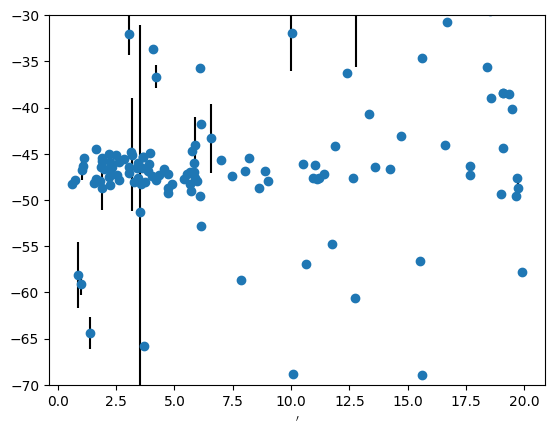

In [15]:
ax.set_ylim(-70, -30)
fig

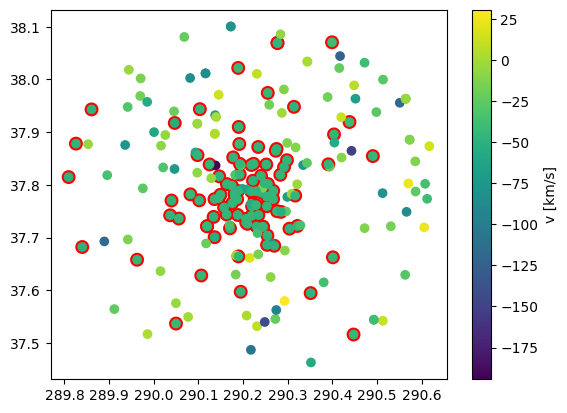

In [16]:
vmsk = (-55<res['vhelio_avg'])&(res['vhelio_avg']<-40)

plt.scatter([n6791.ra.deg], [n6791.dec.deg], c='r', marker='s')
plt.scatter(res['ra'][vmsk], res['dec'][vmsk], lw=4, edgecolor='r', color='none')
plt.scatter(res['ra'], res['dec'], c=res['vhelio_avg'])
plt.colorbar().set_label('v [km/s]')

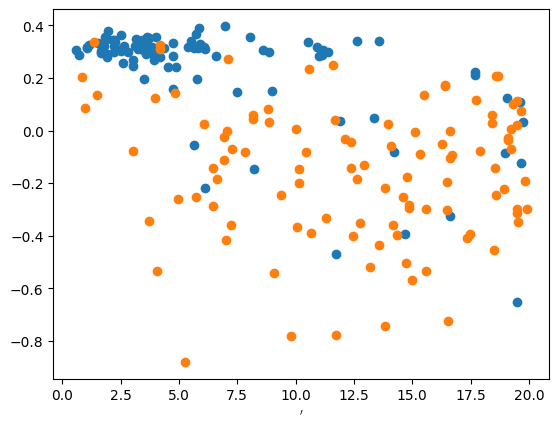

In [17]:
mmsk = res['m_h']>-9999
plt.scatter(r[mmsk&vmsk], res['m_h'][mmsk&vmsk])
plt.scatter(r[mmsk&~vmsk], res['m_h'][mmsk&~vmsk])

Text(0, 0.5, 'm/h')

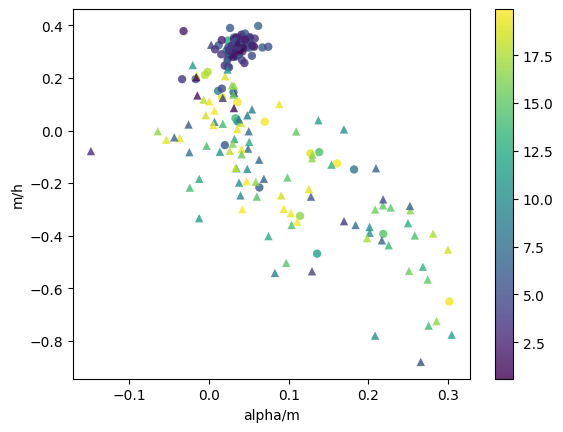

In [18]:
mmsk = res['m_h']>-9999
#omsk = r < 12.5*u.arcmin
omsk = vmsk
res1 = res[mmsk&omsk]
res2 = res[mmsk&~omsk]

plt.scatter(res1['alpha_m'], res1['m_h'], marker='o', alpha=.8, lw=0,
            c=r[mmsk&omsk].value, vmin=r.min().value, vmax=r.max().value)
            #c=res1['vhelio_avg'], vmin=res['vhelio_avg'].min(), vmax=res['vhelio_avg'].max())
plt.scatter(res2['alpha_m'], res2['m_h'], marker='^', alpha=.8, lw=0,
            c=r[mmsk&~omsk].value, vmin=r.min().value, vmax=r.max().value)
            #c=res2['vhelio_avg'], vmin=res['vhelio_avg'].min(), vmax=res['vhelio_avg'].max())
plt.colorbar()
plt.xlabel('alpha/m')
plt.ylabel('m/h')

In [19]:
memfeh = .2
res['member'] = vmsk&(res['m_h']>memfeh)&(r<10*u.arcmin)

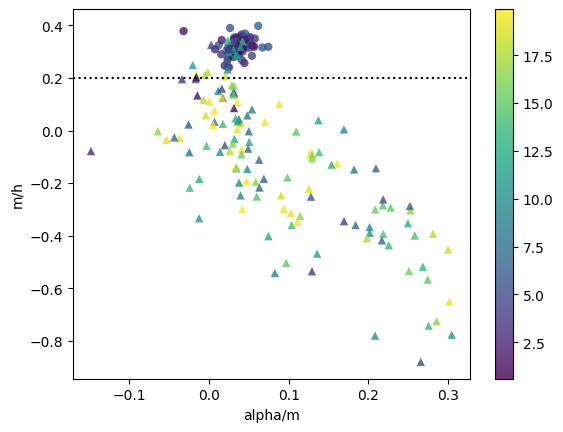

In [20]:
mmsk = res['m_h']>-9999
#omsk = r < 12.5*u.arcmin
omsk = res['member']
res1 = res[mmsk&omsk]
res2 = res[mmsk&~omsk]

plt.scatter(res1['alpha_m'], res1['m_h'], marker='o', alpha=.8, lw=0,
            c=r[mmsk&omsk].value, vmin=r.min().value, vmax=r.max().value)
            #c=res1['vhelio_avg'], vmin=res['vhelio_avg'].min(), vmax=res['vhelio_avg'].max())
plt.scatter(res2['alpha_m'], res2['m_h'], marker='^', alpha=.8, lw=0,
            c=r[mmsk&~omsk].value, vmin=r.min().value, vmax=r.max().value)
            #c=res2['vhelio_avg'], vmin=res['vhelio_avg'].min(), vmax=res['vhelio_avg'].max())
plt.colorbar()
plt.xlabel('alpha/m')
plt.ylabel('m/h')
plt.axhline(memfeh, c='k', ls=':')

In [21]:
towrite = res.copy()

towrite['ra'].unit = u.deg
towrite['dec'].unit = u.deg
towrite['glon'].unit = u.deg
towrite['glat'].unit = u.deg
towrite['vhelio_avg'].unit = u.km/u.s
towrite['vscatter'].unit = u.km/u.s
towrite['teff'].unit = u.K

towrite.remove_column('coo')
towrite.write('NGC6791_apogee.ecsv', format='ascii.ecsv', overwrite=True)

In [22]:
apogee = res # lower confusion when there's two tables below

Compare to JWST data for matches.  See ngc6791_explore_products.ipynb for how this was spelunked

In [23]:
dl_path = Path('mastDownload/')

n6791_prods = table.Table.read('NGC6791_dataproducts.ecsv', format='ascii.ecsv')
prodmap = {}
local_paths = []
dubious_paths = []
for prod in n6791_prods:
    nm = prod['productFilename']
    if nm in prodmap:
        lpath, dub = prodmap[nm]
        local_paths.append(lpath)
        dubious_paths.append(dub)
    else:
        it = dl_path.glob(f'**/{nm}')
        first = next(it)
        try:
            second = next(it)
        except StopIteration:
            second = None
        local_paths.append(str(first))
        dubious_paths.append(second is not None)
        prodmap[nm] = local_paths[-1], dubious_paths[-1]
        
n6791_prods['localPath'] = local_paths
n6791_prods['ambiguousLocalPath'] = dubious_paths

n6791_sci = n6791_prods[n6791_prods['productType'] == 'SCIENCE']
x1d_3s = n6791_sci[(n6791_sci['calib_level'] == 3)&(n6791_sci['productSubGroupDescription'] == 'X1D')]

In [24]:
sids = []
snms = []
nms = []
ras = []
decs = []
slids = []

for p in x1d_3s['localPath']:
    with datamodels.open(p) as f:
        s = f.spec[0]
        sids.append(s.source_id)
        snms.append(s.source_name)
        nms.append(s.name)
        ras.append(s.slit_ra)
        decs.append(s.slit_dec)
        slids.append(s.slitlet_id)

slits = table.Table()
for nm in 'sids,snms,nms,ras,decs,slids'.split(','):
    slits[nm[:-1]] = globals()[nm]

slits['coo'] = SkyCoord.guess_from_table(slits, unit=(u.deg, u.deg))
slits

sid,snm,nm,ra,dec,slid,coo
,,,,,,"deg,deg"
int64,str10,str11,float64,float64,int64,SkyCoord
10,2609_10,NRS_MSASPEC,290.219133911901,37.7411574493274,42,"290.219133911901,37.7411574493274"
21,2609_21,NRS_MSASPEC,290.2536255743246,37.759424215903756,67,"290.2536255743246,37.759424215903756"
38,2609_38,NRS_MSASPEC,290.1882188496649,37.7427598548022,16,"290.1882188496649,37.7427598548022"
40,2609_40,NRS_MSASPEC,290.207187181158,37.72849648922625,21,"290.207187181158,37.72849648922625"
42,2609_42,NRS_MSASPEC,290.20996674543403,37.725955344660775,20,"290.20996674543403,37.725955344660775"
66,2609_66,NRS_MSASPEC,290.2140684282573,37.77515450575545,57,"290.2140684282573,37.77515450575545"
...,...,...,...,...,...,...
8149,2609_8149,NRS_MSASPEC,290.2510838451461,37.75386133547494,61,"290.2510838451461,37.75386133547494"


Now match the two up on coordinates

(array([ 41,  43,  43,  46,  46, 114, 119, 119, 129, 179]),
 array([39,  4,  6,  0, 55,  2,  3, 37,  1,  9]),
 array([3.68436518, 0.12010718, 6.75648235, 0.03670998, 9.08933372,
        0.02036201, 0.12232451, 7.44158188, 0.09537278, 0.04214026]))

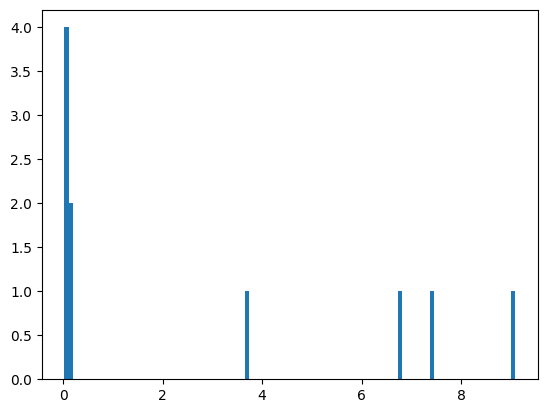

In [25]:
apogeeidx, slitsidx, s2d, _ = slits['coo'].search_around_sky(apogee['coo'], 10*u.arcsec)
plt.hist(s2d.arcsec, bins=100)
apogeeidx, slitsidx, s2d.arcsec

In [26]:
matches = s2d < 1*u.arcsec
apmatch = apogee[apogeeidx[matches]]
jwstmatch = slits[slitsidx[matches]]

In [27]:
matchtab = table.hstack([jwstmatch, apmatch])
matchtab

sid,snm,nm,ra_1,dec_1,slid,coo_1,apstar_id,apogee_id,ra_2,dec_2,glon,glat,apogee_target1,apogee_target2,snr,vhelio_avg,vscatter,nvisits,gaiaedr3_phot_g_mean_mag,j,h,k,teff,logg,m_h,alpha_m,coo_2,member
,,,,,,"deg,deg",,,,,,,,,,,,,,,,,,,,,"deg,deg",
int64,str10,str11,float64,float64,int64,SkyCoord,bytes50,bytes18,float64,float64,float64,float64,int64,int64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,SkyCoord,bool
42,2609_42,NRS_MSASPEC,290.20996674543403,37.725955344660775,20,"290.20996674543403,37.725955344660775",apogee.apo25m.stars.K21_071+10.2M19205038+3743335,2M19205038+3743335,290.209937,37.725979,69.9127785529416,10.8916752049444,0,0,42.32524,-45.09741,6.128836,20,16.2518,14.42,13.918,13.728,4706.299,3.203067,0.34978,0.057345,"290.209937,37.725979",True
10,2609_10,NRS_MSASPEC,290.219133911901,37.7411574493274,42,"290.219133911901,37.7411574493274",apogee.apo25m.stars.K21_071+10.2M19205259+3744281,2M19205259+3744281,290.219146,37.741161,69.9299256425832,10.8917821723641,-2013265408,0,88.73843,-45.02195,0.06552812,2,13.4625,11.135,10.417,10.185,4020.353,1.706269,0.29756,0.0316416,"290.219146,37.741161",True
38,2609_38,NRS_MSASPEC,290.1882188496649,37.7427598548022,16,"290.1882188496649,37.7427598548022",apogee.apo25m.stars.N6791.2M19204517+3744339,2M19204517+3744339,290.188226,37.74276,69.9204799330234,10.914461862144,-2013134848,-2147482620,46.4133,-47.87237,0.0760885,3,14.4558,12.49,11.844,11.704,4362.904,2.450304,0.2567,0.044356,"290.188226,37.74276",True
40,2609_40,NRS_MSASPEC,290.207187181158,37.72849648922625,21,"290.207187181158,37.72849648922625",apogee.apo25m.stars.N6791.2M19204971+3743426,2M19204971+3743426,290.207155,37.728519,69.9141216684547,10.8947661142202,0,-2147482620,390.247,-47.03512,0.2280889,3,12.3939,9.041,8.167,7.815,3515.526,0.8160267,0.2467,0.0196312,"290.207155,37.728519",True
21,2609_21,NRS_MSASPEC,290.2536255743246,37.759424215903756,67,"290.2536255743246,37.759424215903756",apogee.apo25m.stars.N6791.2M19210086+3745339,2M19210086+3745339,290.253593,37.759418,69.9587942574557,10.8753056813111,-2013134848,-2147482620,69.77232,-45.42058,0.1100559,3,14.1097,12.159,11.554,11.383,4416.742,2.269546,0.34755,0.0313609,"290.253593,37.759418",True
150,2609_150,NRS_MSASPEC,290.21848368303745,37.787562517919845,64,"290.21848368303745,37.787562517919845",apogee.apo25m.stars.NGC6791_btx.2M19205243+3747152,2M19205243+3747152,290.21847,37.787567,69.9721672783212,10.9125974685127,0,0,140.0889,-48.29295,0.07966094,12,15.2868,13.423,12.859,12.7,4580.646,2.775499,0.3065,0.038777,"290.21847,37.787567",True


apogee.apo25m.stars.K21_071+10.2M19205038+3743335 42.32524 20 13.918
apogee.apo25m.stars.NGC6791_btx.2M19205243+3747152 140.0889 12 12.859


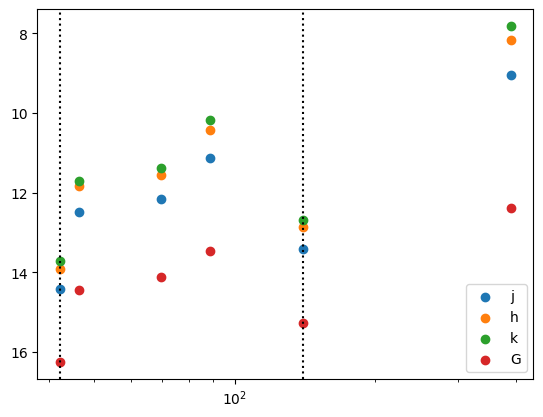

In [28]:
for b in ['j', 'h', 'k', 'gaiaedr3_phot_g_mean_mag']:
    if b == 'gaiaedr3_phot_g_mean_mag':
        l = 'G'
    else:
        l = b
    plt.scatter(matchtab['snr'], matchtab[b], label=l)
plt.semilogx()
plt.ylim(plt.ylim()[::-1])
plt.legend(loc=0)

for row in matchtab:
    if row['nvisits']>10:
        print(row['apstar_id'],row['snr'], row['nvisits'], row['h'])
        plt.axvline(row['snr'], ls=':', c='k')

Some oddities here, but lets forge ahead and look at the JWST slits

In [29]:
t = n6791_sci.copy()[(n6791_sci['productSubGroupDescription']=='CAL')&(n6791_sci['calib_level']==2)&(n6791_sci['dataproduct_type']=='spectrum')]
t.remove_column('parent_obsid')
ucal_tab = table.unique(t, silent=True)
dms = [datamodels.open(row['localPath']) for row in ucal_tab]
#dms = [datamodels.open(ucal_tab['localPath'][1])]
len(dms)

4

In [30]:
matchslits = {}
for dm in dms:
    for slit in dm.slits:
        if slit.source_name in matchtab['snm']:
            matchslits.setdefault(slit.source_name, []).append(slit)
matchslits

{'2609_38': [<stdatamodels.properties.ObjectNode at 0x7fb71b5aff50>,
 '2609_42': [<stdatamodels.properties.ObjectNode at 0x7fb7195bec10>,
 '2609_40': [<stdatamodels.properties.ObjectNode at 0x7fb7188cb890>,
 '2609_10': [<stdatamodels.properties.ObjectNode at 0x7fb7195bc510>,
 '2609_150': [<stdatamodels.properties.ObjectNode at 0x7fb7195bd090>,
 '2609_21': [<stdatamodels.properties.ObjectNode at 0x7fb7195a59d0>,
  <stdatamodels.properties.ObjectNode at 0x7fb70500d850>]}

In [31]:
matchtab['snm', 'j', 'h', 'k']

snm,j,h,k
str10,float64,float64,float64
2609_42,14.42,13.918,13.728
2609_10,11.135,10.417,10.185
2609_38,12.49,11.844,11.704
2609_40,9.041,8.167,7.815
2609_21,12.159,11.554,11.383
2609_150,13.423,12.859,12.7


40 should be the brightest one so lets start there:

/usr/local/lib/python3.11/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)
/usr/local/lib/python3.11/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: divide by zero encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


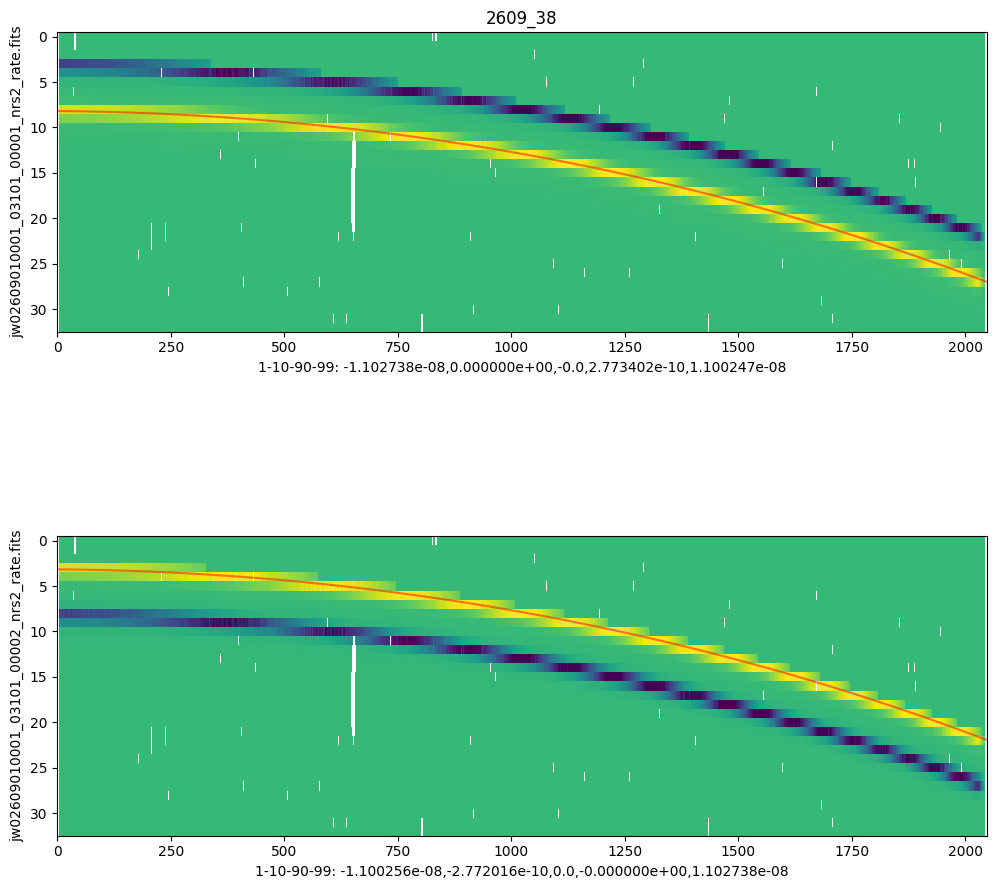

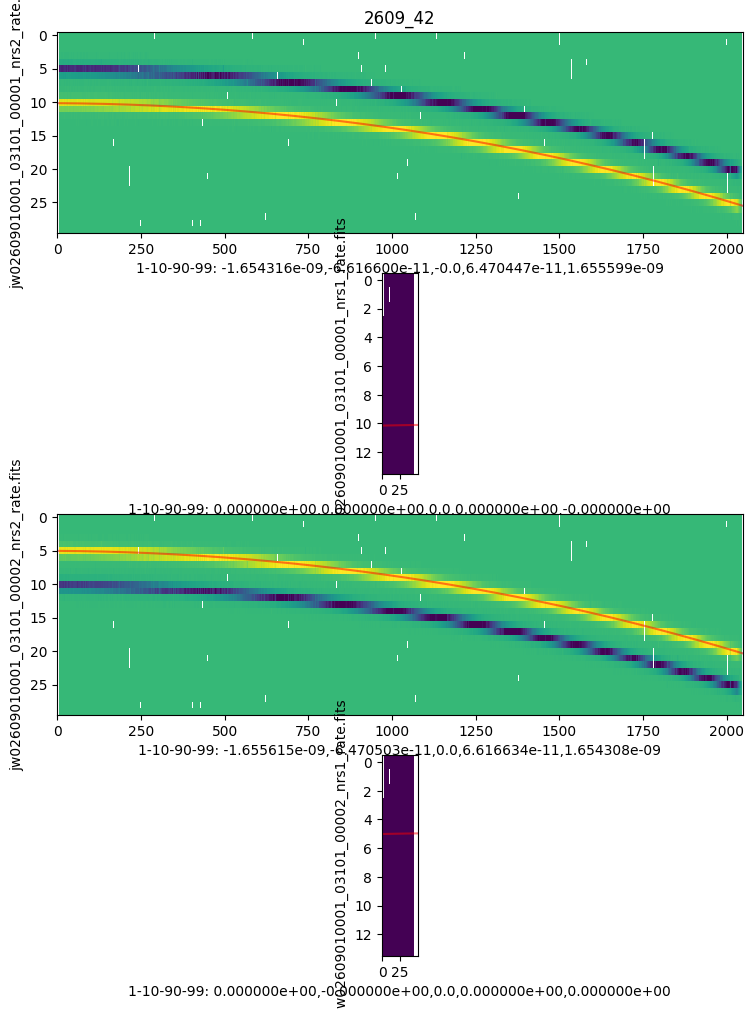

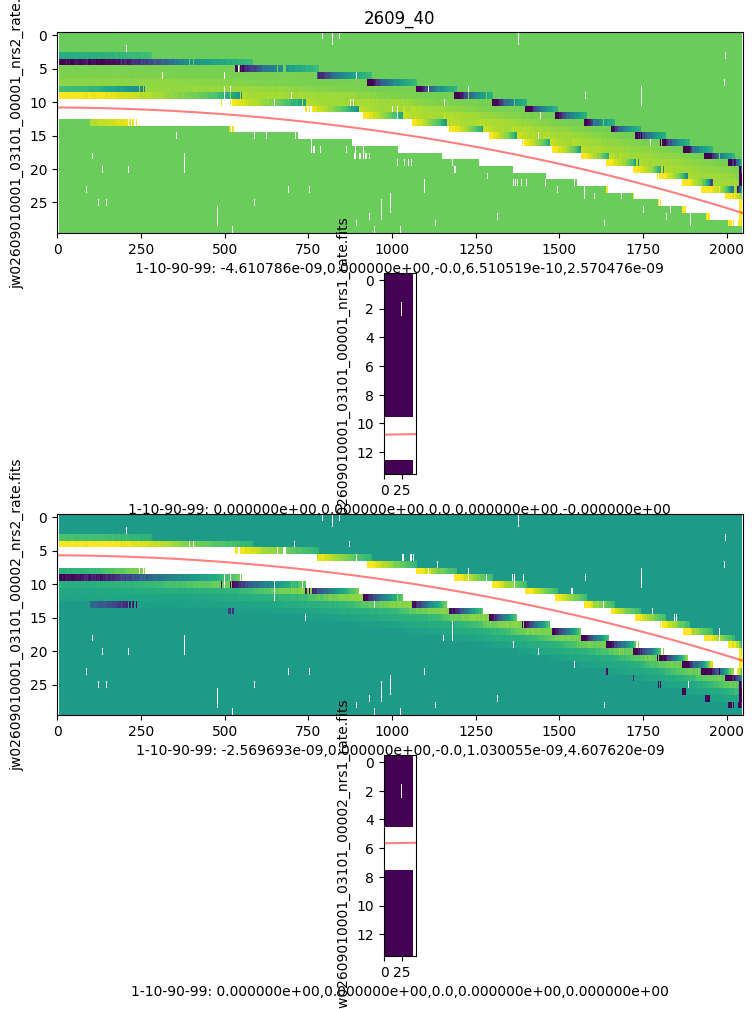

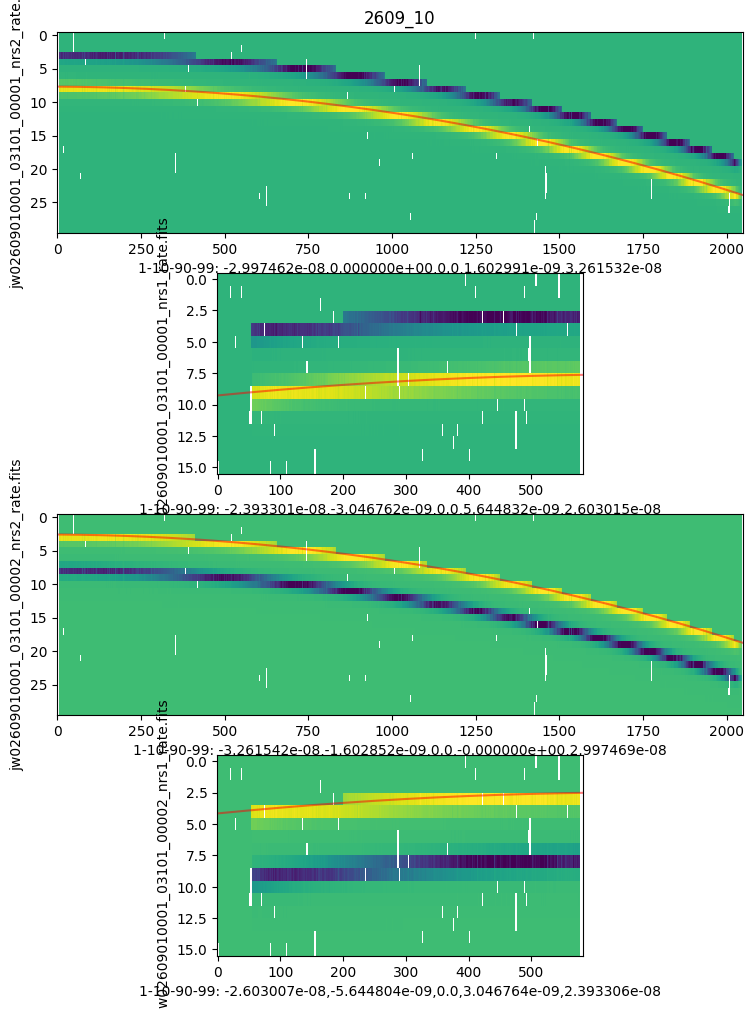

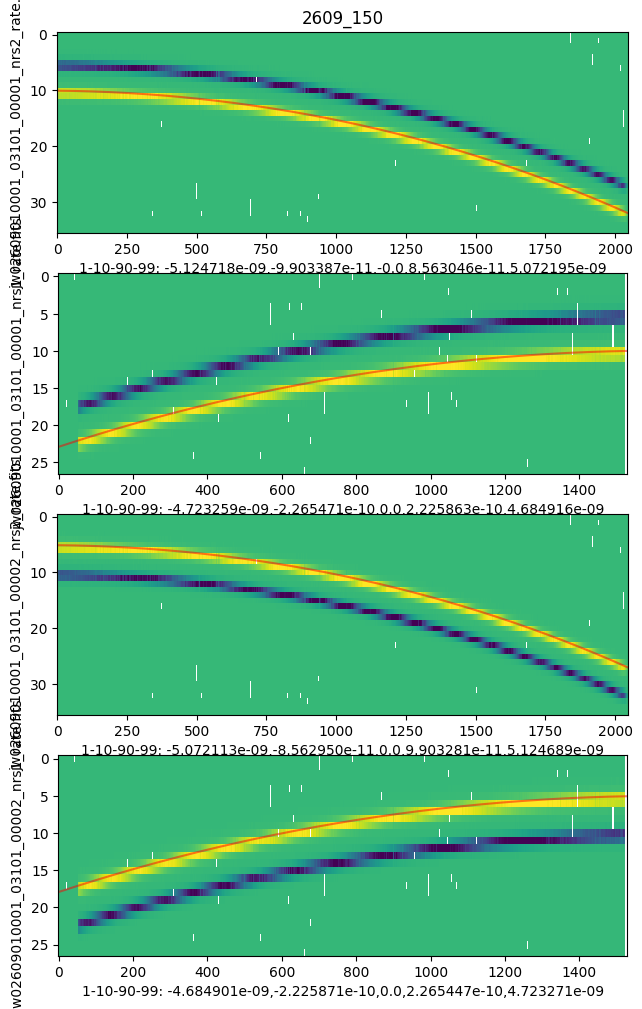

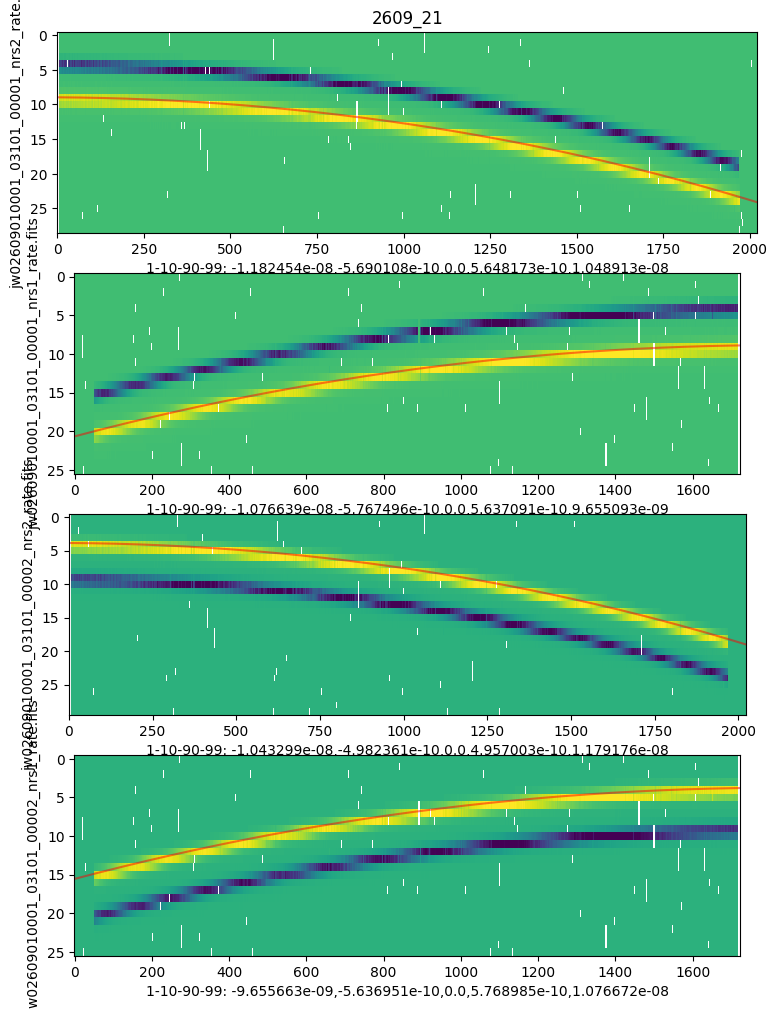

In [33]:
for nm,slits in matchslits.items():
    fig, axs = plt.subplots(len(slits), 1, figsize=(12, 12))
    for slit, ax in zip(slits, axs.ravel()):
        visualization.imshow_norm(slit.data, aspect=20, ax=ax,
                      interval=visualization.PercentileInterval(99),
                      stretch=visualization.AsinhStretch(0.3),
                      interpolation='nearest'
                     )
        xlocus, ylocus = slit.meta.wcs.world_to_pixel(SkyCoord(ra=slit.source_ra, dec=slit.source_dec, unit=u.deg), 
                                                      np.linspace(.5, 2.5, 2500)*u.um)
        xs = ax.get_xlim()
        ys = ax.get_ylim()
        ax.plot(xlocus, ylocus, c='r', ls='-', alpha=.5)
        ax.set_xlim(*xs)
        ax.set_ylim(*ys)
        
        ax.set_ylabel(slit.meta.filename)
        p1, p10, p50, p90, p99 = np.nanquantile(slit.data, [.01, .1, .5, .9, .99])
        ax.set_xlabel(f'1-10-90-99: {p1:e},{p10:e},{p50},{p90:e},{p99:e}')
    axs.ravel()[0].set_title(nm)

Too bright! ? Next brightest is 10

(<matplotlib.image.AxesImage at 0x7fb719e36d10>,
 <astropy.visualization.mpl_normalize.ImageNormalize at 0x7fb70500c850>)

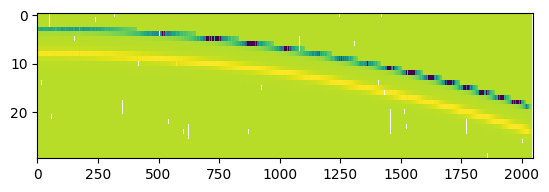

In [32]:
slits = matchslits['2609_10']
slit = slits[0]
visualization.imshow_norm(slit.data, aspect=20, 
              interval=visualization.PercentileInterval(99),
              stretch=visualization.LogStretch(),
              interpolation='nearest'
             )
